# In-Class Exercise 4: Advanced Random Sampling

In this notebook, we will explore some slightly more complicated random sampling methods. 

Some of the following steps have already been incorporated into the templates as denoted by a ✅. 

Study these portions of the notebook, and make your own additions where necessary. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## I. Rejection Sampling

Consider a physical process with the probability distribution function,

$$ 
f(t) = 2(1-t)sin^{2}(4πt) 
$$

on the interval $ -1 \leq t \lt 1 $.  

 - Plot this distribution ✅.
   - Is it normalized?

   - Does it need to be normalized for rejection sampling? 

 - Select a bounding function for rejection sampling.  
   - What criteria must it meet? 

   - Can you think of more than one bounding function? 
   
 - Use rejection sampling to make 10,000 successful samples using a bounding function $g(t)=4$.
 - Estimate your sampling efficiency ✅. 
   - How does your efficiency change if your bounding function is $g(t)=5$? 
   


In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def pdf(t):
    return 2* (1-t) * np.sin(4*np.pi*t)**2

def bounding_func(t):
    return -1.5 * (1 + t) + 4

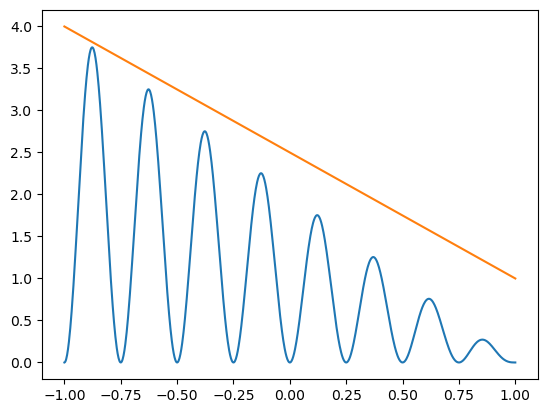

In [4]:
t = np.linspace(-1.0, 1.0, 1000, endpoint=True)
pdf_vals = pdf(t)
plt.plot(t, pdf_vals)
plt.plot(t, [bounding_func(_t) for _t in t])
plt.show()

In [1]:
# uniform bounding function
def inv_cdf_uniform(t_min, t_max):
    """
    Parameters
    ----------
    t_min : Real
        lower bound of the domain
    t_max : Real
        upper bound of the domain
        
    Returns
    -------
    Real : a value on the domain between t_min and t_max        
    """
    None # <-- FILL THIS IN


# linear bounding function
def inv_cdf_linear(t_min, t_max):
    """
    Parameters
    ----------
    t_min : Real
        Lower bound of the domain
    t_max : Real
        Upper bound of the domain
        
    Returns
    -------
    Real : a value on the domain between t_min and t_max
    """
    None # <-- FILL THIS IN


def rejectionSampling(t_min, t_max, bounding_func, bounding_func_inv_cdf, pdf):
    """
    
    Parameters
    ----------
    t_min : Real
        Lower bound of the domain
    t_max : Real
        Upper bound of the domain
    bounding_func : function
        Returns the value of the bounding function for a given value, t
    bounding_func_inv_cdf : function
        Returns the x-value of the inverted CDF for a sampled y-value
    """
    # sample a random value over the domain
    # xp = t_min + np.random.rand() * (t_max - t_min)
    
    # sample a value from the bounding function, g (direct continous sampling of g)
    xp = None # <-- FILL THIS IN
    # evaluate the bounding function at the sampled value
    g = None # <-- FILL THIS IN
    # evaluate the pdf function at the sampled value
    f = None # <-- FILL THIS IN
    # sample another random number to determine whether or not to keep the sample
    xq = np.random.rand()
    # if the sampled value is less than the ratio of the PDF(xp) to g(xp), keep it
    keep_hit = None # <-- FILL THIS IN
    return keep_hit

In [6]:
hit_limit = 10_000
hits = 0
iters = 0
while hits < hit_limit:
    if rejectionSampling(-1, 1, bounding_func, inv_cdf_uniform, pdf):
        hits += 1
    iters += 1

print(f'Iterations to get {hit_limit} hits: {iters}, Sampling efficiency: {hits / iters}')

Iterations to get 10000 hits: 28149, Sampling efficiency: 0.3552524068350563


## II. Histogram Sampling

The cell below defines a five-bin histogram PDF between x=0 and x=10. 

Use the outline below as a guide to perform histogram sampling for this PDF. Remember, histogram sampling is a two-step process involving both direct discrete sampling and direct continuous sampling. Fill in the missing parts of the function `sampleHist` according to the following steps:

1. Discrete sampling: Select one of the uniform bins in the histogram based on the relative areas represented by each histogram bin
  1. Create an array, `widths`, that contains N bin widths.
  2. Create an array, `areas`, that contains N bin areas.
  3. Normalize the area array to generate the normalized PDF probabilities, `pdf`.
  4. Generate the CDF, `cdf`.
  5. Generate a pseudo-random number, `prn`.
  5. Search the CDF to determine which bin, `k`, is sampled. This will look just like the direct discrete random sampling exercise from In-Class Exercise 3.
  
2. Continuous sampling: Now that one of the bins has been chosen, sample within that uniform, continuous bin to yield a final sample
  1. Generate a second random number, `prn2`.
  2. Use `prn2` to sample the shifted uniform distribution to produce an output.
  3. Generate 1000 samples and plot a histogram of your results ✅.  Does it match your expectations?

In [24]:
x = np.linspace(0, 10, 6)
y = np.random.rand(6)

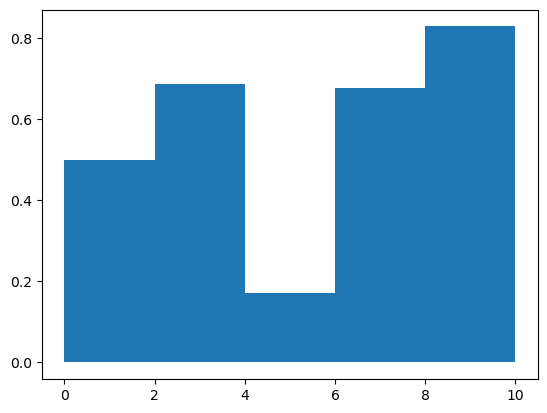

In [25]:
plt.fill_between(x,y, step='pre')

In [6]:
def sampleHist(x, f):
    """Sample a histogram using a random variable
    
    Parameters
    ----------
    x : Iterable of float
        The domain values of the function, f
    f : Iterable of float
        The function values corresponding to domain values, x

    Returns
    -------
    float : the sampled value
    """
    # some value checking to start
    if len(x) < 2:
        raise ValueError('There must be at least 2 histogram boundaries')
    if len(x) != len(f) + 1:
        raise ValueError(f'The size of the histogram boundaries {len(x)} must be one larger than the list of probabilities {len(f)}')
        
    out = 0.0
    
    # create an array of bin widths
    widths = None # <-- FILL THIS IN
    
    # create an arrray of areas within each bin
    areas = None # <-- FILL THIS IN
    
    # normalize the array of areas to form a normalized discrete PDF
    pdf = None # <-- FILL THIS IN
    pdf = None # <-- FILL THIS IN
    # generate the normalized cdf
    cdf = None # <-- FILL THIS IN

    # sample the discrete pdf bin
    prn = np.random.rand()
    k = None # <-- FILL THIS IN
    # generate a new random number
    prn2 = np.random.rand()
    # sample the histogram bin
    out = None # <-- FILL THIS IN
    
    return out

In [7]:
n_samples = 1_000_000
samples = np.zeros((n_samples,), dtype=float)
for i in range(n_samples):
    samples[i] = sampleHist(x, y)

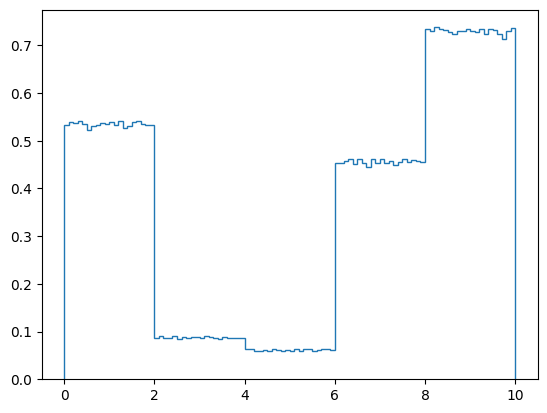

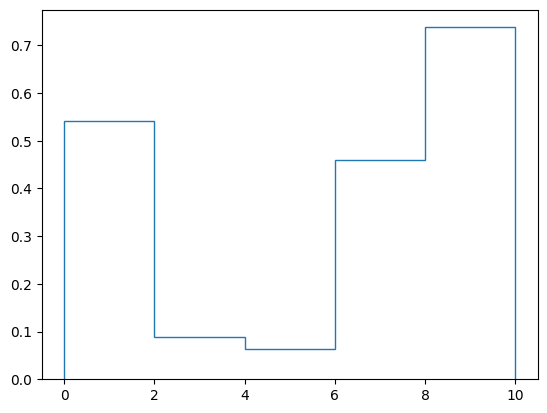

In [8]:
hist, bin_edges = np.histogram(samples, 100)
# normalize the histogram entries to the true distribution
hist = y.max() * hist.astype(float) / hist.max()
plt.stairs(hist, bin_edges)
plt.show()
plt.stairs(y,x)
plt.show()

## III. Piecewise Linear Sampling

The cell below defines a five-section piecewise linear PDF between $x=0$ and $x=100$. 
Use the outline below as a guide to perform piecewise linear sampling for this PDF.

Remember, piecewise sampling is a multi-step process involving both direct discrete sampling and direct continuous sampling. Fill in the missing parts of the `samplePiecewiseLinear` function, outlined in the cell below, according to the following steps:

1. Discrete sampling: Select one of the piecewise portions based on the relative areas represented by each bin.
   1. Create a numpy array, `widths`, that contains N bin widths.
   2. Create a numpy array, `heights`, that contains the N average bin heights.
   3. Create a numpy array, `areas`, that contains N bin areas.
   4. Normalize a (area vector) to generate the normalized PDF probabilities, pdf.
   5. Generate the CDF, `cdf`.
   6. Generate a pseudo-random number, `prn`.
   7. Search the CDF using discrete sampling to determine which bin, `k`, is sampled.
2. Discrete sampling: Select either the triangle or lower rectangle area based on their relative areas in the same piecewise linear portion.
   1. For each piecewise portion, calculate the area of the lower rectangle, `ar`.
   2. For each piecewise portion, determine the probability of choosing the rectangle (relative to its accompanying triangle), `pr`.
   3. Generate a second pseudo-random number, `prn2`.
   4. Use `prn2` to sample whether the rectangle or triangle is to be used in the next step.
3. Continuous sampling: Now a specific portion of a single piecewise bin has been selected. Given which shape was chosen (rectangle or triangle), sample the continuous bin using the appropriate underlying PDF (either shifted uniform or shifted linear) to yield a final sample
   1. Generate a third pseudo-random number, `prn3`.
   2. Use `prn3` to determine a final sample value. The exact method will depend on whether the rectangle or triangle was selected in the steps above.
   3. Generate 10,000 samples and plot a histogram of your results ✅.  Does it match your expectations?

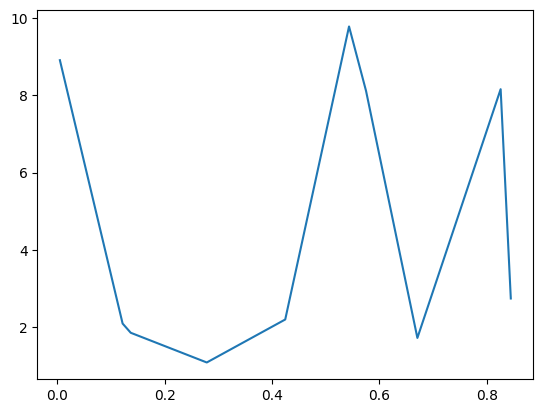

In [187]:
np.random.seed(100)
x = np.sort(np.random.rand(10))
f = 10 * np.random.rand(10)
# x = np.asarray([0.0, 0.25, 0.6, 1.0])
# f = np.asarray([0.0, 6.0, 10.0, 7.0])
plt.plot(x, f)
plt.show()

In [188]:
def samplePiecewiseLinear(x, f):
    """Sample a piecewise linear PDF using a random variable
    
    Parameters
    ----------
    x : Iterable of float
        The domain values of the function, f
    f : Iterable of float
        The function values corresponding to domain values, x
        
    Returns
    -------
    float : the sampled value
    """
    # some value checking
    if len(x) < 3:
        raise ValueError('There must be at least 3 points in the domain')
    if len(x) != len(f):
        raise ValueError(f'The number of domain points ({len(x)}) and PDF points ({len(f)}) must be the same')

    # create an array of bin widths
    widths = None # <-- FILL THIS IN
    # create an array of bin heights
    heights = None # <-- FILL THIS IN
    
    # create an array of areas of each bin
    areas = None # <-- FILL THIS IN
    
    # normalize the array of areas to form a discrete PDF
    pdf = None # <-- FILL THIS IN
    cdf = None # <-- FILL THIS IN

    prn = np.random.rand()
    
    # sample the discrete PDF
    k = None # <-- FILL THIS IN
    
    # for each bin, determine the size of the rectangle
    bin_areas = [] # <-- POPULATE LIST WITH BIN AREAS
    
    # convert rectangle area to rectangle probability
    rect_prob = None # <-- FILL THIS IN
    # generate two additional random numbers
    
    prn2 = np.random.rand() # used to sample either the bin rectangle or triangle
    prn3 = np.random.rand() # used to sample along the bin edge, if needed
    
    # choose the rectangle or triangle
    if None: # <-- PUT THE CORRECT CONDITION HERE
        # sample the uniform distribution of the rectangle
        out = None # <-- FILL THIS IN
    else:        
        # sample the triangle bin, taking care to 
        # account for both positive and negative slope
        if f[k+1] > f[k]:
            out = None # <-- FILL THIS IN
        else:
    return out

In [190]:
n_samples = 100_000
samples = np.array([samplePiecewiseLinear(x, f) for _ in range(n_samples)])

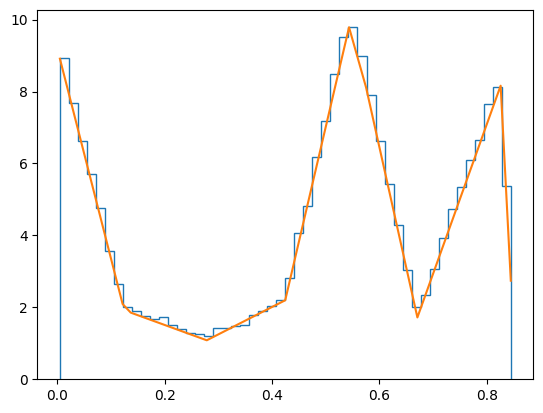

In [192]:
h, bins = np.histogram(samples, 50)
h = f.max() * h.astype(float) / h.max()
plt.stairs(h, bins)
plt.plot(x, f)
plt.show()